# Lab Five - Climate Impacts

## *Normal Distributions of Temperature Data & Health Impacts*

In this lab we will learn how to evaluate histograms and geographically located climate data.  

You will learn how to: 

- Plot histogram data.
- Plot boxplot data.
- Evaluate & create normal distributions. 
- Analyze potential distributions of data.
- Analyze multi-indexed data.
- Annotate figures. 
- Use groupby to group data and analyze.

By the end of this lab you should be able to: plot and evaluate normal distributions.

Additional materials for reading: 
- Plotting example - https://matplotlib.org/gallery/statistics/boxplot_demo.html
- Scientific Source Materials & Inspirations:
    - National Climate Assesment https://nca2014.globalchange.gov/highlights/report-findings/human-health
    - Hansen, Sato & Reto Ruedy. Perception of climate change. PNAS 2012 September, 109 (37) E2415-E2423. https://doi.org/10.1073/pnas.1205276109
- Artistic Inspiration: 
    - https://www.nytimes.com/interactive/2017/07/28/climate/more-frequent-extreme-summer-heat.html?smid=pl-share
            


### Part A: Some format tips - 80 - 100 characters discussion

This is what 80 characters looks like below:

################################################################################

Your notebooks should be around this or 100 characters in width. 
Markdown cells like this one are exempt because they line wrap. 
Your coding cells however, do not. Most
editors will allow you to set this yourself, but Jupyter is a little 
tricky when doing this. 

Instead I leave it as a 80-100 limit to allow a little wiggle room. 

Within coding it is considered standard to have an 80 character limit -
the reason for why is due to the IBM standard punch card system having only 80
characters. This system has stuck on - https://en.wikipedia.org/wiki/Punched_card#IBM_80-column_punched_card_format_and_character_codes



----

### Part B: Some pieces about previous labs - 

Recap on the Bird Lab - 

As most of you discovered when you begin to look into data on how climate impacts birds or other species it can be a little more complicated than just a linear trend. You looked at coastal migration and found that while in aggregate birds moved inward, some specices did not.

How climate impacts species can have multiple trends, and while it's good to keep track of the aggregate - understanding that some species can be impacted in different ways is good to keep in mind. 

Think about how greater temperatures can affect people...will it impact all regions similarly?

----




### Part C: Are there any questions about the upcoming homework or about lab 4? 


----

## *Part 1 - Evaluating Potential Normal Distributions - Skew & Kurtosis*

We previously looked at the temperature distribution as a bar chart - in general temperatures should be distributed in a normal distribution, centered around some average value with extremes forming rare events and the tails of these distribution. 

Our question in this lab, is how this distribution is changing with time for the lower 48 states in the summer months specifically. 

We would like to set up a base time period to evaluate our changes again. This base period should be very much like a normal distribution. In this part of the lab we will use the skew and kurtosis metrics we learned about in lecture to find an appropiate base period. 


In [702]:
#importing required packages

import matplotlib.pyplot as plt #for plotting 
import pandas as pd             #for analyzing data
import numpy as np              #for numpy mean & accuracy
import datetime as dt           #for datetime objects

from scipy.stats import skew, kurtosis, norm 
                                #NEW IN THIS LAB - scipy is another
                                #science module for analyzing data
        
#for plotting in notebook
%matplotlib inline

In [703]:
#first let's check out using the help commands what the skew 
#and kurtosis commands look like - does it center around 1 or around 0?

help(skew)

Help on function skew in module scipy.stats.stats:

skew(a, axis=0, bias=True, nan_policy='propagate')
    Compute the skewness of a data set.
    
    For normally distributed data, the skewness should be about 0. For
    unimodal continuous distributions, a skewness value > 0 means that
    there is more weight in the right tail of the distribution. The
    function `skewtest` can be used to determine if the skewness value
    is close enough to 0, statistically speaking.
    
    Parameters
    ----------
    a : ndarray
        data
    axis : int or None, optional
        Axis along which skewness is calculated. Default is 0.
        If None, compute over the whole array `a`.
    bias : bool, optional
        If False, then the calculations are corrected for statistical bias.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan. 'propagate' returns nan,
        'raise' throws an error, 'omit' performs the calculations igno

In [704]:
#print below here the help command for kurtosis

#WRITE COMMAND HERE






### Reading in Temperature Data 

In [705]:
#read in temperature variance data - again we convert the index to datetime
#format - allowing us to do easier indexing


#This data is from the NOAA site located at 
#https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/ytd/12/1880-2017
#This csv contains the average and anomalies for the last century
#in Farenheit and calculated against the 1901-2000 base period

temperVarUS = pd.read_csv('./Data/US_Temps/USAvrgTemp_ByMonth.txt', header = 4)
temperVarUS.index   = pd.to_datetime(temperVarUS['Date'], infer_datetime_format = False, 
                                  format = '%Y%m')


In [706]:
#make sure this imported correctly - use print, head, or .columns

#ENTER COMMAND BELOW







### Looking at the Original Base Period

In [707]:
#set up date indexing 
startDate = dt.datetime(1901, 1, 1)
endDate   = dt.datetime(2000, 1, 1)


#May, June, June, July, August, September

#NOTE count the parenthesis around the or conditions - see how you
#have to double it? 
indSummer = ((temperVarUS.index >= startDate) & (temperVarUS.index <= endDate) & 
            ( (temperVarUS.index.month == 5) | 
              (temperVarUS.index.month == 6) | 
              (temperVarUS.index.month == 7) |
              (temperVarUS.index.month == 8) |
              (temperVarUS.index.month == 9)) )


#let's make sure this indexed the correct months - 
print(temperVarUS.loc[indSummer, 'Value'].head(n=10))

Date
1901-05-01    61.18
1901-06-01    68.43
1901-07-01    76.24
1901-08-01    73.20
1901-09-01    63.25
1902-05-01    61.99
1902-06-01    68.04
1902-07-01    72.05
1902-08-01    71.37
1902-09-01    62.76
Name: Value, dtype: float64


The number of bins for the histogram is: 23.0


(array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12]),
 <a list of 7 Text yticklabel objects>)

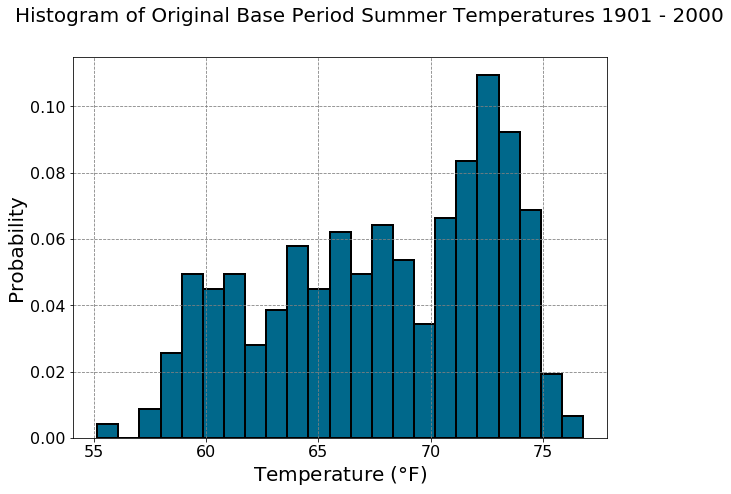

In [708]:
#what does the histogram of this look like? 

#set up the figure 
fig = plt.figure(figsize=(11, 7))
fig.suptitle('Histogram of Original Base Period Summer Temperatures' + 
             ' {:%Y} - {:%Y}'.format(startDate, endDate), 
             fontsize=20)

gs = plt.GridSpec(1, 1, hspace=0.2, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#calculate using the general rule of thumb - 

#minimum as the sqrt(sampleSize)
sampleSize = len(temperVarUS.loc[indSummer, :])

#could also use np.floor - both find the integer 
# - ceil rounds up and I want MORE bins than
#minimum

numBins = np.ceil(np.sqrt(sampleSize))
print("The number of bins for the histogram is: {}".format(numBins))

#values is first entry, followed by number of bins, normed is the
#normalization factor, ie normalize to 1. 

#edgecolor and linewidth set up the bin edges
ax1.hist(temperVarUS.loc[indSummer, 'Value'], int(numBins),
         normed = 1, facecolor = '#00688b', edgecolor="k", linewidth = 2.0)

#set up grid
plt.grid(color='gray', linestyle='dashed')

#labels
plt.xlabel('Temperature ($\degree$F)', fontsize = 20)
plt.ylabel('Probability', fontsize = 20)
#large ticks
plt.xticks(fontsize=16) #make the xaxis labels larger
plt.yticks(fontsize=16) #make the yaxis labels larger

This is the distribution of summer temperatures (May - September) within the 
base period - does this look like a normal distribution? We want to normalize to 
something like a normal distribution - 

### Looking at the Kurtosis & Skew

In [709]:
#of the distirbution above - what does our skew / kurtosis look like?

print("Skew: {:.1f}, Kurtosis: {:.1f}, Standard Dev: {:.1f}, Mean: {:.1f}".format(
        skew(temperVarUS.loc[indSummer, 'Value']), 
        kurtosis(temperVarUS.loc[indSummer, 'Value'], fisher = False), 
        np.std(temperVarUS.loc[indSummer, 'Value'], ddof = 1), 
        np.mean(temperVarUS.loc[indSummer, 'Value'])))


Skew: -0.4, Kurtosis: 1.9, Standard Dev: 5.1, Mean: 67.8


### What about just a month?

Ideally the mulitple normals should collapse into 1

In [710]:
#set up date indexing 
startDate = dt.datetime(1901, 1, 1)
endDate   = dt.datetime(2000, 1, 1)


#just June
indMonth = ((temperVarUS.index >= startDate) & (temperVarUS.index <= endDate) & 
            (temperVarUS.index.month == 6))


#let's make sure this indexed the correct months - 
print(temperVarUS.loc[indMonth, 'Value'].head(n=10))

Date
1901-06-01    68.43
1902-06-01    68.04
1903-06-01    65.89
1904-06-01    67.26
1905-06-01    68.00
1906-06-01    67.32
1907-06-01    65.70
1908-06-01    66.92
1909-06-01    68.94
1910-06-01    68.29
Name: Value, dtype: float64


The number of bins for the histogram is: 10.0


(array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35]),
 <a list of 8 Text yticklabel objects>)

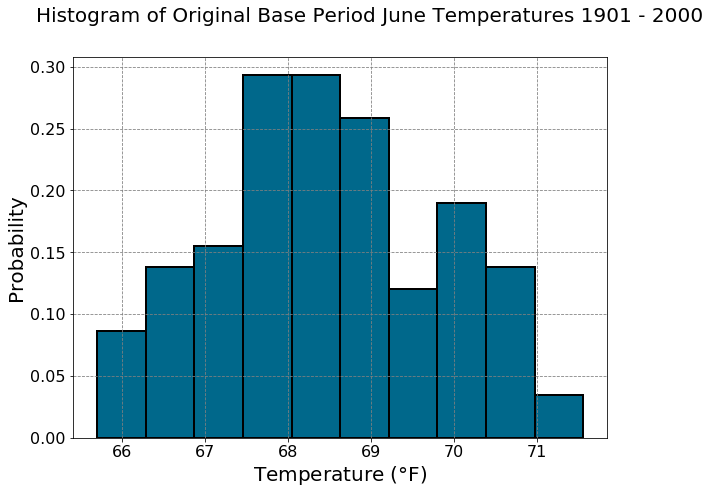

In [711]:
#what does the histogram of this look like? 

#set up the figure 
fig = plt.figure(figsize=(11, 7))
fig.suptitle('Histogram of Original Base Period June Temperatures' + 
             ' {:%Y} - {:%Y}'.format(startDate, endDate), 
             fontsize=20)

gs = plt.GridSpec(1, 1, hspace=0.2, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#calculate using the general rule of thumb - 

#minimum as the sqrt(sampleSize)
sampleSize = len(temperVarUS.loc[indMonth, :])

#could also use np.floor - both find the integer 
# - ceil rounds up and I want MORE bins than
#minimum

numBins = np.ceil(np.sqrt(sampleSize))
print("The number of bins for the histogram is: {}".format(numBins))

#values is first entry, followed by number of bins, normed is the
#normalization factor, ie normalize to 1. 

#edgecolor and linewidth set up the bin edges
ax1.hist(temperVarUS.loc[indMonth, 'Value'], int(numBins),
         normed = 1, facecolor = '#00688b', edgecolor="k", linewidth = 2.0)

#set up grid
plt.grid(color='gray', linestyle='dashed')

#labels
plt.xlabel('Temperature ($\degree$F)', fontsize = 20)
plt.ylabel('Probability', fontsize = 20)
#large ticks
plt.xticks(fontsize=16) #make the xaxis labels larger
plt.yticks(fontsize=16) #make the yaxis labels larger

What about this one? Is this better? Check out the kurtosis / skew again - 

In [712]:
print("Skew: {:.1f}, Kurtosis: {:.1f}, Standard Dev: {:.1f}, Mean: {:.1f}".format(
        skew(temperVarUS.loc[indMonth, 'Value']), 
        kurtosis(temperVarUS.loc[indMonth, 'Value'], fisher = False), 
        np.std(temperVarUS.loc[indMonth, 'Value'], ddof = 1), 
        np.mean(temperVarUS.loc[indMonth, 'Value'])))


Skew: 0.1, Kurtosis: 2.4, Standard Dev: 1.4, Mean: 68.5


It still looks like we have a small skew though - this is 
likely due to our wide range of base time period - what about 
removing some of the later years?

### Adjusted Base Period


The number of bins for the histogram is: 7.0
Skew: 0.0, Kurtosis: 2.8, Standard Dev: 1.1, Mean: 68.4


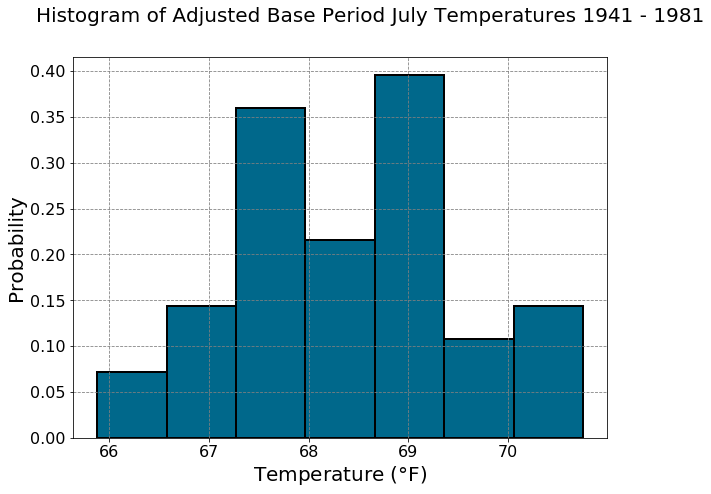

In [713]:
#set up date indexing 
startDate = dt.datetime(1941, 1, 1)
endDate   = dt.datetime(1981, 1, 1)


#looking at June
indMonth = ((temperVarUS.index >= startDate) & (temperVarUS.index <= endDate) & 
            (temperVarUS.index.month == 6))
#set up the figure 
fig = plt.figure(figsize=(11, 7))
fig.suptitle('Histogram of Adjusted Base Period July Temperatures' + 
             ' {:%Y} - {:%Y}'.format(startDate, endDate), 
             fontsize=20)

gs = plt.GridSpec(1, 1, hspace=0.2, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#calculate using the general rule of thumb - 

#minimum as the sqrt(sampleSize)
sampleSize = len(temperVarUS.loc[indMonth, :])

#could also use np.floor - both find the integer 
# - ceil rounds up and I want MORE bins than
#minimum

numBins = np.ceil(np.sqrt(sampleSize))
print("The number of bins for the histogram is: {}".format(numBins))

#values is first entry, followed by number of bins, normed is the
#normalization factor, ie normalize to 1. 

#edgecolor and linewidth set up the bin edges
ax1.hist(temperVarUS.loc[indMonth, 'Value'], int(numBins),
         normed = 1, facecolor = '#00688b', edgecolor="k", linewidth = 2.0)

#set up grid
plt.grid(color='gray', linestyle='dashed')

#labels
plt.xlabel('Temperature ($\degree$F)', fontsize = 20)
plt.ylabel('Probability', fontsize = 20)
#large ticks
plt.xticks(fontsize=16) #make the xaxis labels larger
plt.yticks(fontsize=16) #make the yaxis labels larger

print("Skew: {:.1f}, Kurtosis: {:.1f}, Standard Dev: {:.1f}, Mean: {:.1f}".format(
        skew(temperVarUS.loc[indMonth, 'Value']), 
        kurtosis(temperVarUS.loc[indMonth, 'Value'], fisher = False), 
        np.std(temperVarUS.loc[indMonth, 'Value'], ddof = 1), 
        np.mean(temperVarUS.loc[indMonth, 'Value'])))

Has the skew/kurtosis improved? What does this NOT tell us?

## *Part 2 - Adjusting to New Base Period*

As we already saw we need to treat each month differently. If we want NEW 
anomaly data then in our dataframe then we should run through EACH month. 

In [714]:
startDate = dt.datetime(1941, 1, 1)
endDate   = dt.datetime(1981, 1, 1)

monthsArr = np.arange(1, 13)

temperVarUS['T_Values'] = np.nan
temperVarUS['Adjust_Anoms'] = np.nan


We would like to calculate BOTH the anomalies given the new normal base period AND T_Values or the standard deviation normalized differencies from the mean. 

In [715]:
for month in monthsArr:
    #loop through months
    
    #set up index
    indDate = ((temperVarUS.index >= startDate) & (temperVarUS.index < endDate) &  
           (temperVarUS.index.month == month))
    print("\nRunning for Month: {}".format(month))
    
    #and set the values for standard deviation and averages
    stdDev = np.std(temperVarUS.loc[indDate, 'Value'], ddof = 1)
    avrg   = np.mean(temperVarUS.loc[indDate, 'Value'])
    
    #print to make sure nothing is completly off with the normal distributions
    print("Skew: {:.1f}, Kurtosis: {:.1f}".format(
        skew(temperVarUS.loc[indDate, 'Value']), 
        kurtosis(temperVarUS.loc[indDate, 'Value'], fisher = False)))
    
    #set up adjusted anomalies
    indMonth = (temperVarUS.index.month == month)
    adjustedAnoms =  ((temperVarUS.loc[indMonth, 'Value'] - avrg))
          
    #while we are at it - how about we also calculate the normalized value, 
    # or the t / z value.
    tVals =  ((temperVarUS.loc[indMonth, 'Value'] - avrg) * (1.0 / stdDev))
    
    temperVarUS.loc[indMonth, 'T_Values'] = tVals
    temperVarUS.loc[indMonth, 'Adjust_Anoms'] = adjustedAnoms
    


Running for Month: 1
Skew: -0.6, Kurtosis: 3.9

Running for Month: 2
Skew: 0.5, Kurtosis: 3.8

Running for Month: 3
Skew: 0.2, Kurtosis: 2.2

Running for Month: 4
Skew: -0.1, Kurtosis: 2.8

Running for Month: 5
Skew: -0.0, Kurtosis: 2.1

Running for Month: 6
Skew: 0.0, Kurtosis: 2.8

Running for Month: 7
Skew: -0.0, Kurtosis: 3.1

Running for Month: 8
Skew: 0.1, Kurtosis: 2.6

Running for Month: 9
Skew: -0.3, Kurtosis: 2.6

Running for Month: 10
Skew: 0.4, Kurtosis: 4.1

Running for Month: 11
Skew: -0.3, Kurtosis: 2.5

Running for Month: 12
Skew: -0.2, Kurtosis: 2.6


### Replotting Base Period

Now that we have the adjusted anomolies what does the base period look like for the summer months? Can we plot all the months together now?


The number of bins for the histogram is: 15.0
Skew: -0.1, Kurtosis: 2.7, Standard Dev: 1.1, Mean: -0.0


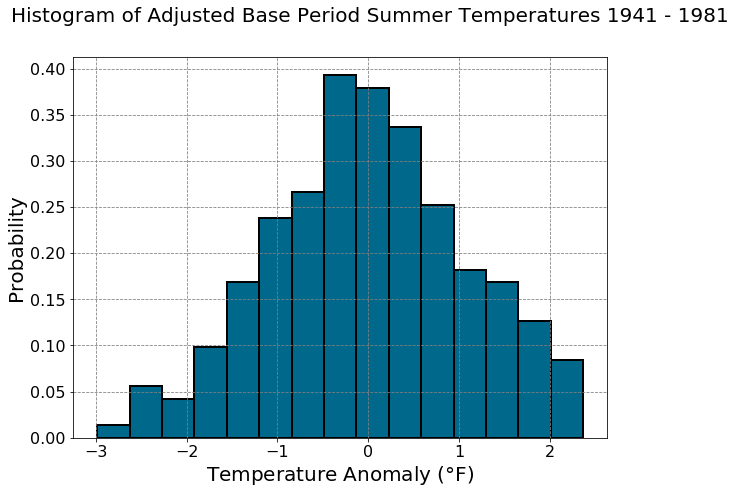

In [716]:
#set up date indexing 
startDate = dt.datetime(1941, 1, 1)
endDate   = dt.datetime(1981, 1, 1)

indSummer = ((temperVarUS.index >= startDate) & (temperVarUS.index <= endDate) & 
            ( (temperVarUS.index.month == 5) | 
              (temperVarUS.index.month == 6) | 
              (temperVarUS.index.month == 7) |
              (temperVarUS.index.month == 8) |
              (temperVarUS.index.month == 9)) )

#set up the figure 
fig = plt.figure(figsize=(11, 7))
fig.suptitle('Histogram of Adjusted Base Period Summer Temperatures' + 
             ' {:%Y} - {:%Y}'.format(startDate, endDate), 
             fontsize=20)

gs = plt.GridSpec(1, 1, hspace=0.2, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#calculate using the general rule of thumb - 

#minimum as the sqrt(sampleSize)
sampleSize = len(temperVarUS.loc[indSummer, :])

#could also use np.floor - both find the integer 
# - ceil rounds up and I want MORE bins than
#minimum

numBins = np.ceil(np.sqrt(sampleSize))
print("The number of bins for the histogram is: {}".format(numBins))

#values is first entry, followed by number of bins, normed is the
#normalization factor, ie normalize to 1. 

#edgecolor and linewidth set up the bin edges
ax1.hist(temperVarUS.loc[indSummer, 'Adjust_Anoms'], int(numBins),
         normed = 1, facecolor = '#00688b', edgecolor="k", linewidth = 2.0)

#set up grid
plt.grid(color='gray', linestyle='dashed')

#labels
plt.xlabel('Temperature Anomaly ($\degree$F)', fontsize = 20)
plt.ylabel('Probability', fontsize = 20)
#large ticks
plt.xticks(fontsize=16) #make the xaxis labels larger
plt.yticks(fontsize=16) #make the yaxis labels larger

print("Skew: {:.1f}, Kurtosis: {:.1f}, Standard Dev: {:.1f}, Mean: {:.1f}".format(
        skew(temperVarUS.loc[indSummer, 'Adjust_Anoms']), 
        kurtosis(temperVarUS.loc[indSummer, 'Adjust_Anoms'], fisher = False), 
        np.std(temperVarUS.loc[indSummer, 'Adjust_Anoms'], ddof = 1), 
        np.mean(temperVarUS.loc[indSummer, 'Adjust_Anoms'])))

Do we think plotting it as the t-values or the normalized standard distribution witll change anything?


### Plotting in Normalized Standard Deviation (t-values)

The number of bins for the histogram is: 15.0
Skew: -0.0, Kurtosis: 2.6, Standard Dev: 1.0, Mean: -0.0


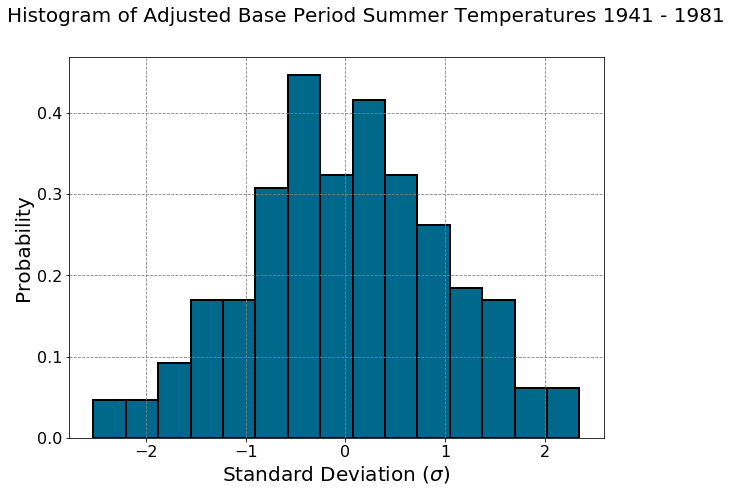

In [717]:

#the main change in this plotting block is the quantity being plotted - 

#set up the figure 
fig = plt.figure(figsize=(11, 7))
fig.suptitle('Histogram of Adjusted Base Period Summer Temperatures' + 
             ' {:%Y} - {:%Y}'.format(startDate, endDate), 
             fontsize=20)

gs = plt.GridSpec(1, 1, hspace=0.2, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#calculate using the general rule of thumb - 

#minimum as the sqrt(sampleSize)
sampleSize = len(temperVarUS.loc[indSummer, :])

#could also use np.floor - both find the integer 
# - ceil rounds up and I want MORE bins than
#minimum

numBins = np.ceil(np.sqrt(sampleSize))
print("The number of bins for the histogram is: {}".format(numBins))

#values is first entry, followed by number of bins, normed is the
#normalization factor, ie normalize to 1. 

#edgecolor and linewidth set up the bin edges
ax1.hist(temperVarUS.loc[indSummer, 'T_Values'], int(numBins),
         normed = 1, facecolor = '#00688b', edgecolor="k", linewidth = 2.0)

#set up grid
plt.grid(color='gray', linestyle='dashed')

#labels
plt.xlabel('Standard Deviation ($\sigma$)', fontsize = 20)
plt.ylabel('Probability', fontsize = 20)
#large ticks
plt.xticks(fontsize=16) #make the xaxis labels larger
plt.yticks(fontsize=16) #make the yaxis labels larger

print("Skew: {:.1f}, Kurtosis: {:.1f}, Standard Dev: {:.1f}, Mean: {:.1f}".format(
        skew(temperVarUS.loc[indSummer, 'T_Values']), 
        kurtosis(temperVarUS.loc[indSummer, 'T_Values'], fisher = False), 
        np.std(temperVarUS.loc[indSummer, 'T_Values'], ddof = 1), 
        np.mean(temperVarUS.loc[indSummer, 'T_Values'])))

## *Part 3 - Adding Normal Distribution Boundaries*



This whole time we've been discussing this like a normal distribution - what if we draw a 
normal distribution on this? 

This is not quite line fitting, instead this is assuming that given the standard deviation
and mean of this distrbution what is the normal distribution?

In [718]:
#making a normal distribution line - we can use the norm.pdf() command

#TYPE HELP on the NORM PDF COMMAND BELOW

The number of bins for the histogram is: 15.0
Skew: -0.0, Kurtosis: 2.6, Standard Dev: 1.0, Mean: -0.0


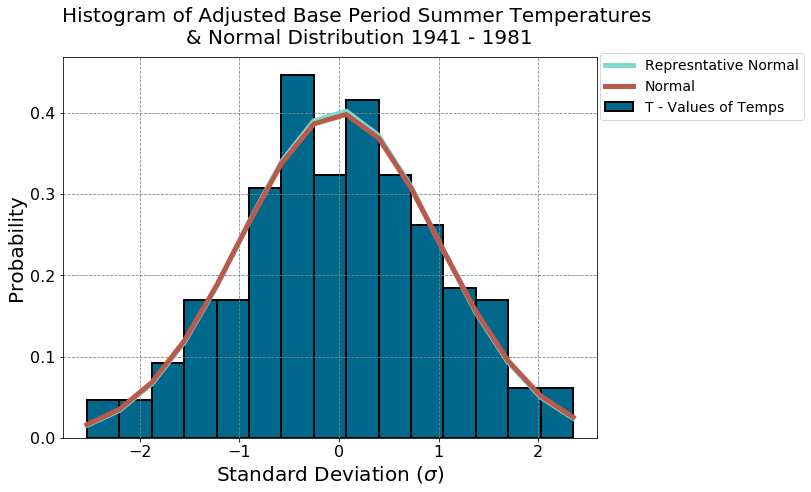

In [719]:
#set up the figure 
fig = plt.figure(figsize=(11, 7))
fig.suptitle('Histogram of Adjusted Base Period Summer Temperatures \n' + 
             '& Normal Distribution' + 
             ' {:%Y} - {:%Y}'.format(startDate, endDate), 
             fontsize=20)

gs = plt.GridSpec(1, 1, hspace=0.2, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#calculate using the general rule of thumb - 

#minimum as the sqrt(sampleSize)
sampleSize = len(temperVarUS.loc[indSummer, :])

#could also use np.floor - both find the integer 
# - ceil rounds up and I want MORE bins than
#minimum

numBins = np.ceil(np.sqrt(sampleSize))
print("The number of bins for the histogram is: {}".format(numBins))

#values is first entry, followed by number of bins, normed is the
#normalization factor, ie normalize to 1. 


######________START CHANGE

#edgecolor and linewidth set up the bin edges
n, bins, patches = ax1.hist(temperVarUS.loc[indSummer, 'T_Values'], int(numBins),
         normed = 1, facecolor = '#00688b', edgecolor="k", linewidth = 2.0, 
                            label = 'T - Values of Temps')

#plot of adjusted normal - command is x valyes, then mean, then stdDev.
ax1.plot(bins, norm.pdf(bins, np.mean(temperVarUS.loc[indSummer, 'T_Values']), 
                        np.std(temperVarUS.loc[indSummer, 'T_Values'], ddof = 1)), 
                         color = '#81d8d0', linewidth = 5.0, label = 'Represntative Normal')

#of a totally normal distribution?
ax1.plot(bins, norm.pdf(bins, 0, 1), color = '#ba5a4c', linewidth = 5.0, 
         label = 'Normal')

######________END CHANGES


#set up grid
plt.grid(color='gray', linestyle='dashed')

#labels
plt.xlabel('Standard Deviation ($\sigma$)', fontsize = 20)
plt.ylabel('Probability', fontsize = 20)
#large ticks
plt.xticks(fontsize=16) #make the xaxis labels larger
plt.yticks(fontsize=16) #make the yaxis labels larger

print("Skew: {:.1f}, Kurtosis: {:.1f}, Standard Dev: {:.1f}, Mean: {:.1f}".format(
        skew(temperVarUS.loc[indSummer, 'T_Values']), 
        kurtosis(temperVarUS.loc[indSummer, 'T_Values'], fisher = False), 
        np.std(temperVarUS.loc[indSummer, 'T_Values'], ddof = 1), 
        np.mean(temperVarUS.loc[indSummer, 'T_Values'])))

ax1.legend(bbox_to_anchor = (1.4, 1.03), prop={'size':14})

Does this chart answer how recent decades have compared???


### Part 3: Annotating Plots & Time Series Normal Distributions

In this part we will plot out how changes in the distribution have progress in recent years for the summer time temperatures of the lower 58 states.



The number of bins for the histogram is: 15.0

 Between 1985 - 2000 
 Skew: 0.2, Kurtosis: 3.0, Standard Dev: 1.2, Mean: 0.3


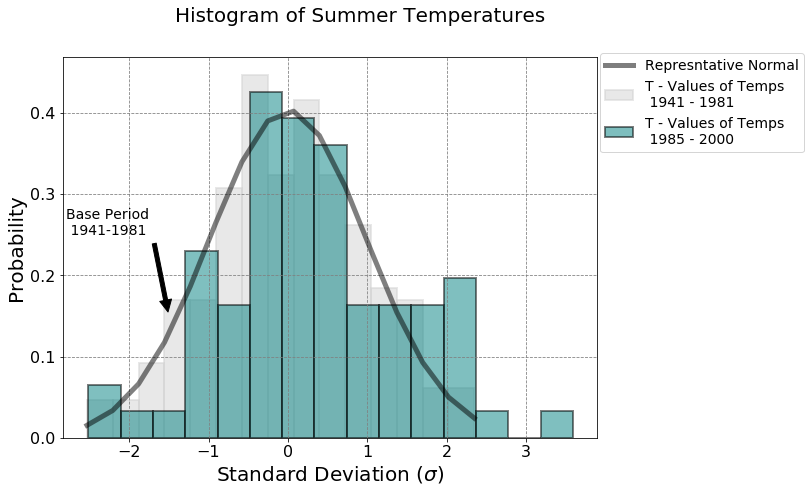

In [720]:
### start plotting figure - 

#set up the figure 
fig = plt.figure(figsize=(11, 7))
fig.suptitle('Histogram of Summer Temperatures', fontsize=20)

gs = plt.GridSpec(1, 1, hspace=0.2, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#calculate using the general rule of thumb - 

#minimum as the sqrt(sampleSize)
sampleSize = len(temperVarUS.loc[indSummer, :])

#could also use np.floor - both find the integer 
# - ceil rounds up and I want MORE bins than
#minimum

numBins = np.ceil(np.sqrt(sampleSize))
print("The number of bins for the histogram is: {}".format(numBins))

#values is first entry, followed by number of bins, normed is the
#normalization factor, ie normalize to 1. 


######________START CHANGE

#edgecolor and linewidth set up the bin edges
n, bins, patches = ax1.hist(temperVarUS.loc[indSummer, 'T_Values'], int(numBins),
         normed = 1, facecolor = '#d3d3d3', edgecolor="#d3d3d3", 
         alpha = 0.5, linewidth = 2.0, 
         label = 'T - Values of Temps \n {:%Y} - {:%Y}'.format(
         startDate, endDate))

#plot of adjusted normal - command is x valyes, then mean, then stdDev.
ax1.plot(bins, norm.pdf(bins, np.mean(temperVarUS.loc[indSummer, 'T_Values']), 
                        np.std(temperVarUS.loc[indSummer, 'T_Values'], ddof = 1)), 
                         color = 'k', alpha = 0.5, 
                         linewidth = 5.0, label = 'Represntative Normal')



startDateNineties = dt.datetime(1985, 1, 1)
endDateNineties   = dt.datetime(2000, 1, 1)

indNineties = ((temperVarUS.index >= startDateNineties) & 
             (temperVarUS.index <= endDateNineties) & 
            ( (temperVarUS.index.month == 5) | 
              (temperVarUS.index.month == 6) | 
              (temperVarUS.index.month == 7) |
              (temperVarUS.index.month == 8) |
              (temperVarUS.index.month == 9)) )


ax1.hist(temperVarUS.loc[indNineties, 'T_Values'], int(numBins),
         normed = 1, facecolor = '#008080', edgecolor="k", 
         alpha = 0.5, linewidth = 2.0, 
         label = 'T - Values of Temps \n {:%Y} - {:%Y}'.format(
         startDateNineties, endDateNineties))




#set up grid
plt.grid(color='gray', linestyle='dashed')

#labels
plt.xlabel('Standard Deviation ($\sigma$)', fontsize = 20)
plt.ylabel('Probability', fontsize = 20)
#large ticks
plt.xticks(fontsize=16) #make the xaxis labels larger
plt.yticks(fontsize=16) #make the yaxis labels larger


#plot out statistics of the new dist.
print("\n Between {:%Y} - {:%Y} \n".format(startDateNineties, endDateNineties) + 
      " Skew: {:.1f}, Kurtosis: {:.1f}, Standard Dev: {:.1f}, Mean: {:.1f}".format(
        skew(temperVarUS.loc[indNineties, 'T_Values']), 
        kurtosis(temperVarUS.loc[indNineties, 'T_Values'], fisher = False), 
        np.std(temperVarUS.loc[indNineties, 'T_Values'], ddof = 1), 
        np.mean(temperVarUS.loc[indNineties, 'T_Values'])))


#annotates axis with text and arrow toward point - in coordinates 
ax1.annotate('Base Period \n {:%Y}-{:%Y}'.format(startDate, endDate), xy=(-1.5, 0.15), 
            xytext=(-2.8, 0.25),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 14)
######________END CHANGES
ax1.legend(bbox_to_anchor = (1.4, 1.03), prop={'size':14})

The number of bins for the histogram is: 15.0

 Between 2000 - 2017 
 Skew: -0.3, Kurtosis: 2.7, Standard Dev: 1.1, Mean: 1.2


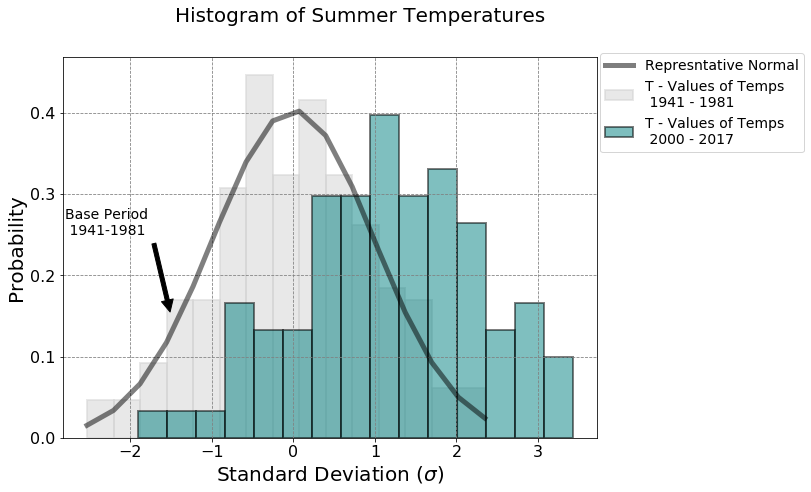

In [721]:
### Plotting Recent - 

### start plotting figure - 

#set up the figure 
fig = plt.figure(figsize=(11, 7))
fig.suptitle('Histogram of Summer Temperatures', fontsize=20)

gs = plt.GridSpec(1, 1, hspace=0.2, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#calculate using the general rule of thumb - 

#minimum as the sqrt(sampleSize)
sampleSize = len(temperVarUS.loc[indSummer, :])

#could also use np.floor - both find the integer 
# - ceil rounds up and I want MORE bins than
#minimum

numBins = np.ceil(np.sqrt(sampleSize))
print("The number of bins for the histogram is: {}".format(numBins))

#values is first entry, followed by number of bins, normed is the
#normalization factor, ie normalize to 1. 


######________START CHANGE

#edgecolor and linewidth set up the bin edges
n, bins, patches = ax1.hist(temperVarUS.loc[indSummer, 'T_Values'], int(numBins),
         normed = 1, facecolor = '#d3d3d3', edgecolor="#d3d3d3", 
         alpha = 0.5, linewidth = 2.0, 
         label = 'T - Values of Temps \n {:%Y} - {:%Y}'.format(
         startDate, endDate))

#plot of adjusted normal - command is x valyes, then mean, then stdDev.
ax1.plot(bins, norm.pdf(bins, np.mean(temperVarUS.loc[indSummer, 'T_Values']), 
                        np.std(temperVarUS.loc[indSummer, 'T_Values'], ddof = 1)), 
                         color = 'k', alpha = 0.5, 
                         linewidth = 5.0, label = 'Represntative Normal')



startDateRecent = dt.datetime(2000, 1, 1)
endDateRecent   = dt.datetime(2017, 1, 1)

indRecent= ((temperVarUS.index >= startDateRecent) & 
             (temperVarUS.index <= endDateRecent) & 
            ( (temperVarUS.index.month == 5) | 
              (temperVarUS.index.month == 6) | 
              (temperVarUS.index.month == 7) |
              (temperVarUS.index.month == 8) |
              (temperVarUS.index.month == 9)) )


ax1.hist(temperVarUS.loc[indRecent, 'T_Values'], int(numBins),
         normed = 1, facecolor = '#008080', edgecolor="k", 
         alpha = 0.5, linewidth = 2.0, 
         label = 'T - Values of Temps \n {:%Y} - {:%Y}'.format(
         startDateRecent, endDateRecent))




#set up grid
plt.grid(color='gray', linestyle='dashed')

#labels
plt.xlabel('Standard Deviation ($\sigma$)', fontsize = 20)
plt.ylabel('Probability', fontsize = 20)
#large ticks
plt.xticks(fontsize=16) #make the xaxis labels larger
plt.yticks(fontsize=16) #make the yaxis labels larger


#plot out statistics of the new dist.
print("\n Between {:%Y} - {:%Y} \n".format(startDateRecent, endDateRecent) + 
      " Skew: {:.1f}, Kurtosis: {:.1f}, Standard Dev: {:.1f}, Mean: {:.1f}".format(
        skew(temperVarUS.loc[indRecent, 'T_Values']), 
        kurtosis(temperVarUS.loc[indRecent, 'T_Values'], fisher = False), 
        np.std(temperVarUS.loc[indRecent, 'T_Values'], ddof = 1), 
        np.mean(temperVarUS.loc[indRecent, 'T_Values'])))


#annotates axis with text and arrow toward point - in coordinates 
ax1.annotate('Base Period \n {:%Y}-{:%Y}'.format(startDate, endDate), xy=(-1.5, 0.15), 
            xytext=(-2.8, 0.25),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 14)
######________END CHANGES

ax1.legend(bbox_to_anchor = (1.4, 1.03), prop={'size':14})

How would you interepret this plot given what you know about standard deviation and normal distributions?

## *Part 4 - Relevant Health Impact Data - Evaluating Data*

Up to now we've been looking into temperature data - what about geolocated temperature data that has impacts on human health? According to the National Climate Assesment (2014) 

"Extreme heat events are the leading weather-related cause of death in the United States. Many cities, including St. Louis, Philadelphia, Chicago, and Cincinnati have suffered dramatic spikes in death rates during heat waves...deaths result from heat stroke and related conditions...Heat waves are also associated with increased hospital admissions for cardiovascular, kidney, and respiratory disorders."

https://nca2014.globalchange.gov/highlights/report-findings/human-health


In [722]:
#let's import our data from the Center for Disease Control on county level extreme heat
#days


#This data is from the CDC at https://ephtracking.cdc.gov/showClimateChangeLanding.action
#and represents the number of days exceding the 90% threshold of maximum temperature within
#the summer months between May - September. 

#A 0 in this database can EITHER mean no data, OR no recorded days.
healthImpactUS = pd.read_csv('./Data/CDC_Health_HeatIndex/data_161717.csv')


In [723]:
#while we can always look at the head - let's check out another method below...

healthImpactUS.head(n=6)

,stateFIPS,State,countyFIPS,County,Year,Value,Stability,Relative Threshold,Heat Metric
0,1,Alabama,1001,Autauga,1979,0,1,90th Percentile,Daily Maximum Temperature
1,1,Alabama,1001,Autauga,1980,16,1,90th Percentile,Daily Maximum Temperature
2,1,Alabama,1001,Autauga,1981,14,1,90th Percentile,Daily Maximum Temperature
3,1,Alabama,1001,Autauga,1982,0,1,90th Percentile,Daily Maximum Temperature
4,1,Alabama,1001,Autauga,1983,5,1,90th Percentile,Daily Maximum Temperature
5,1,Alabama,1001,Autauga,1984,0,1,90th Percentile,Daily Maximum Temperature


In [724]:
healthImpactUS.describe()

#what does this tell us? - would you consider this a large dataset?


,stateFIPS,countyFIPS,Year,Value,Stability
count,108819.000000,108819.000000,108819.000000,108819.000000,108819.0
mean,30.575855,30679.309542,1996.000055,13.291190,1.0
std,14.964504,14983.940365,10.099372,13.837534,0.0
min,1.000000,1001.000000,1979.000000,0.000000,1.0
25%,19.000000,19045.000000,1987.000000,3.000000,1.0
50%,29.000000,29213.000000,1996.000000,9.000000,1.0
75%,46.000000,46009.000000,2005.000000,19.000000,1.0
max,56.000000,56045.000000,2013.000000,109.000000,1.0


###  Replacing Suspect Zero Values

Let's go ahead and replace all the zeros with np.nan's for easier tracking. This means
that we are automatically discounting any potential 0 days - keep this in mind the trade off is that we are no longer weighting years & counties with no data as realistic values.

In [725]:
#replace all suspected 0 data with np.nans

healthImpactUS = healthImpactUS.replace(0, np.nan)

#note how the min changed?
healthImpactUS.describe()

,stateFIPS,countyFIPS,Year,Value,Stability
count,108819.000000,108819.000000,108819.000000,96155.000000,108819.0
mean,30.575855,30679.309542,1996.000055,15.041693,1.0
std,14.964504,14983.940365,10.099372,13.797287,0.0
min,1.000000,1001.000000,1979.000000,1.000000,1.0
25%,19.000000,19045.000000,1987.000000,5.000000,1.0
50%,29.000000,29213.000000,1996.000000,11.000000,1.0
75%,46.000000,46009.000000,2005.000000,21.000000,1.0
max,56.000000,56045.000000,2013.000000,109.000000,1.0


This data is rather annoying to use due to the fact that it has the structure of a multi-level index - you can index with either or both state, year, and county. 

For example - if you wanted a time series of Washtenaw County in Michigan...

In [726]:
localIndex = (healthImpactUS['State']=='Michigan') & (healthImpactUS['County']=='Washtenaw')
print(healthImpactUS.loc[localIndex, ['State', 'County', 'Year', 'Value']])


          State     County  Year  Value
44695  Michigan  Washtenaw  1979    2.0
44696  Michigan  Washtenaw  1980   10.0
44697  Michigan  Washtenaw  1981    2.0
44698  Michigan  Washtenaw  1982    3.0
44699  Michigan  Washtenaw  1983   18.0
44700  Michigan  Washtenaw  1984    9.0
44701  Michigan  Washtenaw  1985    3.0
44702  Michigan  Washtenaw  1986    6.0
44703  Michigan  Washtenaw  1987   23.0
44704  Michigan  Washtenaw  1988   40.0
44705  Michigan  Washtenaw  1989    3.0
44706  Michigan  Washtenaw  1990    8.0
44707  Michigan  Washtenaw  1991   20.0
44708  Michigan  Washtenaw  1992    2.0
44709  Michigan  Washtenaw  1993    7.0
44710  Michigan  Washtenaw  1994   11.0
44711  Michigan  Washtenaw  1995   17.0
44712  Michigan  Washtenaw  1996    6.0
44713  Michigan  Washtenaw  1997    6.0
44714  Michigan  Washtenaw  1998   11.0
44715  Michigan  Washtenaw  1999   15.0
44716  Michigan  Washtenaw  2000    2.0
44717  Michigan  Washtenaw  2001   14.0
44718  Michigan  Washtenaw  2002   21.0


But what if you wanted all the states, including their counties averaged and to an aggregate value by year of this table? 


What are some ways we've learned to do that before???

In [727]:
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#














### Example 1 - The Dictionary / For Loop Method

We've seen this before when we made a file reader.

In [728]:
#we could for example loop over all the years and do an average...

years = healthImpactUS.Year.unique()

print(years)

[1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013]


In [729]:
aggImpactData = {}

#and then set up entries of the year, and of entries full of nan
aggImpactData['Date'] = years
aggImpactData['AllStates'] = np.zeros(len(years))*np.nan
aggImpactData['AllStates_min'] = np.zeros(len(years))*np.nan
aggImpactData['AllStates_max'] = np.zeros(len(years))*np.nan

for i, y in enumerate(years):
    timeIndex = (healthImpactUS['Year'] == y)
    
    #remember how we have nan's?
    aggImpactData['AllStates'][i]     = np.nanmean(healthImpactUS.loc[timeIndex, 'Value'])
    aggImpactData['AllStates_min'][i] = np.nanmin(healthImpactUS.loc[timeIndex, 'Value'])
    aggImpactData['AllStates_max'][i] = np.nanmax(healthImpactUS.loc[timeIndex, 'Value'])

Was taking the average the best idea here though? We never looked at the variance...remember how this is now averaging ALL states AND counties together?

What might be some issues when dealing with county level data? What does the plot and describe method tell you about this data?

,stateFIPS,countyFIPS,Year,Value,Stability
count,108819.000000,108819.000000,108819.000000,96155.000000,108819.0
mean,30.575855,30679.309542,1996.000055,15.041693,1.0
std,14.964504,14983.940365,10.099372,13.797287,0.0
min,1.000000,1001.000000,1979.000000,1.000000,1.0
25%,19.000000,19045.000000,1987.000000,5.000000,1.0
50%,29.000000,29213.000000,1996.000000,11.000000,1.0
75%,46.000000,46009.000000,2005.000000,21.000000,1.0
max,56.000000,56045.000000,2013.000000,109.000000,1.0


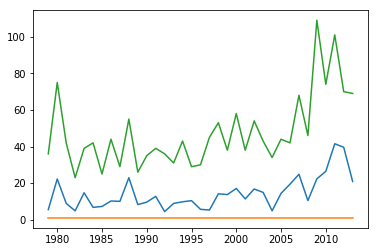

In [730]:
plt.plot(aggImpactData['Date'], aggImpactData['AllStates'])
plt.plot(aggImpactData['Date'], aggImpactData['AllStates_min'])
plt.plot(aggImpactData['Date'], aggImpactData['AllStates_max'])

healthImpactUS.describe()


### Example 2 - Dealing with Extremes - Box Plots & Groupby

We could keep using dictionaries to get around but there are some handy pre-set methods in Pandas we can use


In [731]:
#for example - if we wanted to repeat the same calculation as before...taking a mean
#but outside of a for loop - we could do the following

exampleMean = healthImpactUS.groupby(['Year'], as_index=False)['Value'].mean()

#go ahead and print example mean here - what do you think this did?

#ENTER COMMAND BELOW








In [732]:
#Remember however the spread on that? Let's intead do a box plot...

exampleBoxData = healthImpactUS.groupby(['Year'], 
                as_index=False)['Value'].quantile([0.25,0.5,0.75])

#go ahead and print this!


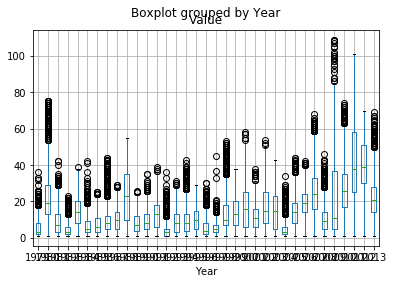

In [733]:
#you could for example just plot this and for quick look plots I do encourage this - 

#cool huh? Most pandas dataframes have inbuild plotting - this runs in the background
#the groupby method that we just saw above...

#it's auto formatting is a bit nasty...

healthImpactUS.boxplot(column='Value', by='Year')

## *Part 5 - Relevant Health Impact Data - Box Plots*

I like my plots to be pretty specific however. So we will also learn the more "matplotlib-ish" way of plotting a series of box plots. The box plot command takes in a list of values and locations for box plots if you are interested in making mulitple box plots. Below we set this up and plot it.

In [734]:
groups = healthImpactUS.groupby(['Year'], 
                as_index=False)

#if you want to iterate over a groupby object
for name, group in groups:
    #notice how the groups in a groupby object are all mini-dataframes?
    #it has inherited this type
    print(name, group.columns, type(group))
    

1979 Index(['stateFIPS', 'State', 'countyFIPS', 'County', 'Year', 'Value',
       'Stability', 'Relative Threshold', 'Heat Metric'],
      dtype='object') <class 'pandas.core.frame.DataFrame'>
1980 Index(['stateFIPS', 'State', 'countyFIPS', 'County', 'Year', 'Value',
       'Stability', 'Relative Threshold', 'Heat Metric'],
      dtype='object') <class 'pandas.core.frame.DataFrame'>
1981 Index(['stateFIPS', 'State', 'countyFIPS', 'County', 'Year', 'Value',
       'Stability', 'Relative Threshold', 'Heat Metric'],
      dtype='object') <class 'pandas.core.frame.DataFrame'>
1982 Index(['stateFIPS', 'State', 'countyFIPS', 'County', 'Year', 'Value',
       'Stability', 'Relative Threshold', 'Heat Metric'],
      dtype='object') <class 'pandas.core.frame.DataFrame'>
1983 Index(['stateFIPS', 'State', 'countyFIPS', 'County', 'Year', 'Value',
       'Stability', 'Relative Threshold', 'Heat Metric'],
      dtype='object') <class 'pandas.core.frame.DataFrame'>
1984 Index(['stateFIPS', 'State', '

In [735]:
#we want these in a list - we can use list comprehension like so to do this
exampleList = [x**2 for x in range(10)]

print(exampleList)


[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [736]:
boxPlotData = [group['Value'].values for name, group in groups]

#look familiar?
print(boxPlotData[0])
print(type(boxPlotData))
print(type(boxPlotData[0]))


[ nan  nan  nan ...,  17.  11.  13.]
<class 'list'>
<class 'numpy.ndarray'>


In [737]:
#the box plot command is pretty picky with nans - notice how we have quite a few in 
#there from replacing the poorly formatted data?

#here we've inserted a locator to identify where it is a nan value, and remove this
boxPlotData = [group.loc[~np.isnan(group['Value']), 
                         'Value'].values for name, group in groups]
print(boxPlotData[0])
print(type(boxPlotData))
print(type(boxPlotData[0]))



[  1.   1.   1. ...,  17.  11.  13.]
<class 'list'>
<class 'numpy.ndarray'>


### Plotting Box Plots on Extreme Heat With Temperature Data


The number of bins for the histogram is: 15.0

 Between 2000 - 2017 
 Skew: -0.3, Kurtosis: 2.7, Standard Dev: 1.1, Mean: 1.2


([<matplotlib.axis.XTick at 0x13b799710>,
 <a list of 4 Text xticklabel objects>)

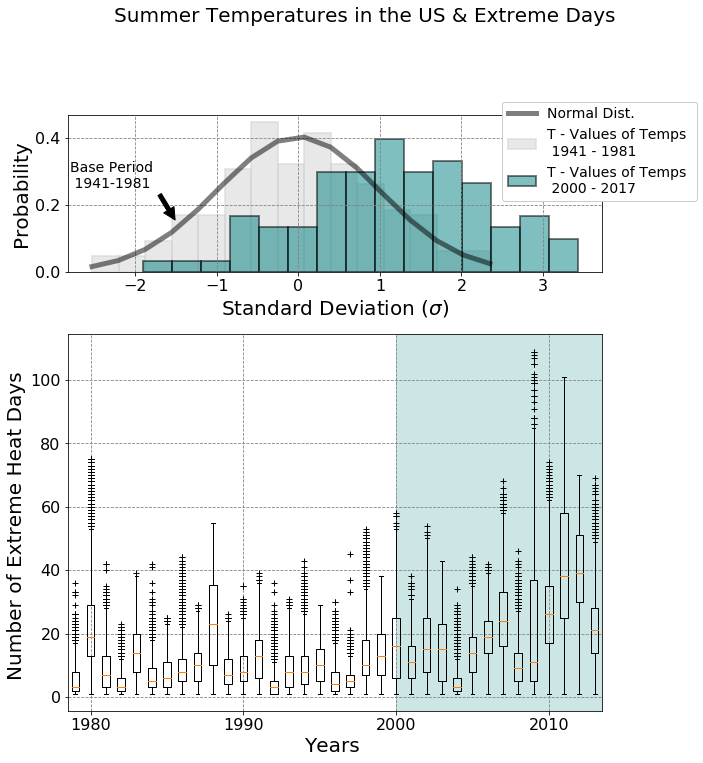

In [738]:
### Plotting Recent - 

### start plotting figure - 

#set up the figure 
fig = plt.figure(figsize=(11, 15))
fig.suptitle('Summer Temperatures in the US & Extreme Days', fontsize=20)

gs = plt.GridSpec(4, 1, hspace=0.4, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1:3,:])

#calculate using the general rule of thumb - 

#minimum as the sqrt(sampleSize)
sampleSize = len(temperVarUS.loc[indSummer, :])

#could also use np.floor - both find the integer 
# - ceil rounds up and I want MORE bins than
#minimum

numBins = np.ceil(np.sqrt(sampleSize))
print("The number of bins for the histogram is: {}".format(numBins))

#values is first entry, followed by number of bins, normed is the
#normalization factor, ie normalize to 1. 



#edgecolor and linewidth set up the bin edges
n, bins, patches = ax1.hist(temperVarUS.loc[indSummer, 'T_Values'], int(numBins),
         normed = 1, facecolor = '#d3d3d3', edgecolor="#d3d3d3", 
         alpha = 0.5, linewidth = 2.0, 
         label = 'T - Values of Temps \n {:%Y} - {:%Y}'.format(
         startDate, endDate))

#plot of adjusted normal - command is x valyes, then mean, then stdDev.
ax1.plot(bins, norm.pdf(bins, np.mean(temperVarUS.loc[indSummer, 'T_Values']), 
                        np.std(temperVarUS.loc[indSummer, 'T_Values'], ddof = 1)), 
                         color = 'k', alpha = 0.5, 
                         linewidth = 5.0, label = 'Normal Dist.')



startDateRecent = dt.datetime(2000, 1, 1)
endDateRecent   = dt.datetime(2017, 1, 1)

indRecent= ((temperVarUS.index >= startDateRecent) & 
             (temperVarUS.index <= endDateRecent) & 
            ( (temperVarUS.index.month == 5) | 
              (temperVarUS.index.month == 6) | 
              (temperVarUS.index.month == 7) |
              (temperVarUS.index.month == 8) |
              (temperVarUS.index.month == 9)) )


ax1.hist(temperVarUS.loc[indRecent, 'T_Values'], int(numBins),
         normed = 1, facecolor = '#008080', edgecolor="k", 
         alpha = 0.5, linewidth = 2.0, 
         label = 'T - Values of Temps \n {:%Y} - {:%Y}'.format(
         startDateRecent, endDateRecent))



#set up grid
ax1.grid(color='gray', linestyle='dashed')

#labels
ax1.set_xlabel('Standard Deviation ($\sigma$)', fontsize = 20)
ax1.set_ylabel('Probability', fontsize = 20)
#large ticks

ax1.tick_params(labelsize = 16)


#plot out statistics of the new dist.
print("\n Between {:%Y} - {:%Y} \n".format(startDateRecent, endDateRecent) + 
      " Skew: {:.1f}, Kurtosis: {:.1f}, Standard Dev: {:.1f}, Mean: {:.1f}".format(
        skew(temperVarUS.loc[indRecent, 'T_Values']), 
        kurtosis(temperVarUS.loc[indRecent, 'T_Values'], fisher = False), 
        np.std(temperVarUS.loc[indRecent, 'T_Values'], ddof = 1), 
        np.mean(temperVarUS.loc[indRecent, 'T_Values'])))


#annotates axis with text and arrow toward point - in coordinates 
ax1.annotate('Base Period \n {:%Y}-{:%Y}'.format(startDate, endDate), xy=(-1.5, 0.15), 
            xytext=(-2.8, 0.25),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 14)


leg = ax1.legend(bbox_to_anchor = (0.8, 1.13), prop={'size':14})
leg.get_frame().set_alpha(1.0)

#-------------------------------------------

#box plot is pretty picky with data formats

####START BOX PLOT
pos = healthImpactUS.Year.unique()


#python chooses the shikerse to default to the point of Q3 (upper edge of box)
#+ whisker lenghth * InterQuartile Range - you can set this to be
#something other than 1.5 which is default with whis = 1.5
ax2.boxplot(boxPlotData, sym='k+', positions = pos)

#shade in the region that corresponds with the temp data
ax2.axvspan(startDateRecent.year, endDateRecent.year, 
            alpha = 0.2, color ='#008080')

ax2.grid(color='gray', linestyle='dashed')
ax2.tick_params(labelsize = 16)

ax2.set_ylabel('Number of Extreme Heat Days ', fontsize = 20)
ax2.set_xlabel('Years ', fontsize = 20)

#the boxplot has odd behaivor around xticks - this is another
#way outside of mulitple locator to handle tick marks
plt.xticks([1980, 1990, 2000, 2010], ['1980', '1990', '2000', '2010'])


Would it make sense to reject the 'fliers'? The outliers marked by a + in these plots?

### Slightly adjusted boxplot command

The number of bins for the histogram is: 15.0

 Between 2000 - 2017 
 Skew: -0.3, Kurtosis: 2.7, Standard Dev: 1.1, Mean: 1.2


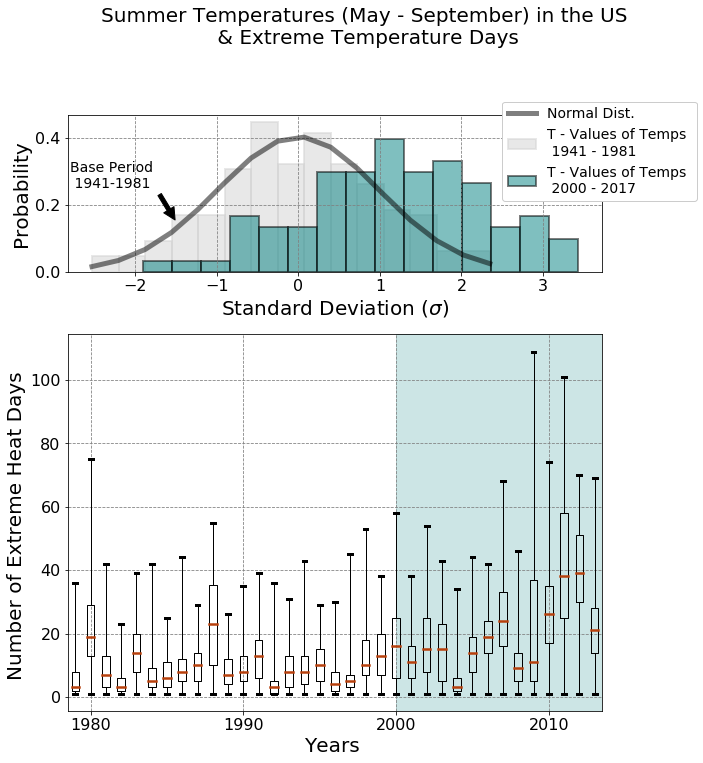

In [739]:


### start plotting figure - 

#set up the figure 
fig = plt.figure(figsize=(11, 15))
fig.suptitle('Summer Temperatures (May - September) in the US' + 
             '\n & Extreme Temperature Days', fontsize=20)

gs = plt.GridSpec(4, 1, hspace=0.4, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1:3,:])

#calculate using the general rule of thumb - 

#minimum as the sqrt(sampleSize)
sampleSize = len(temperVarUS.loc[indSummer, :])

#could also use np.floor - both find the integer 
# - ceil rounds up and I want MORE bins than
#minimum

numBins = np.ceil(np.sqrt(sampleSize))
print("The number of bins for the histogram is: {}".format(numBins))

#values is first entry, followed by number of bins, normed is the
#normalization factor, ie normalize to 1. 



#edgecolor and linewidth set up the bin edges
n, bins, patches = ax1.hist(temperVarUS.loc[indSummer, 'T_Values'], int(numBins),
         normed = 1, facecolor = '#d3d3d3', edgecolor="#d3d3d3", 
         alpha = 0.5, linewidth = 2.0, 
         label = 'T - Values of Temps \n {:%Y} - {:%Y}'.format(
         startDate, endDate))

#plot of adjusted normal - command is x valyes, then mean, then stdDev.
ax1.plot(bins, norm.pdf(bins, np.mean(temperVarUS.loc[indSummer, 'T_Values']), 
                        np.std(temperVarUS.loc[indSummer, 'T_Values'], ddof = 1)), 
                         color = 'k', alpha = 0.5, 
                         linewidth = 5.0, label = 'Normal Dist.')



startDateRecent = dt.datetime(2000, 1, 1)
endDateRecent   = dt.datetime(2017, 1, 1)

indRecent= ((temperVarUS.index >= startDateRecent) & 
             (temperVarUS.index <= endDateRecent) & 
            ( (temperVarUS.index.month == 5) | 
              (temperVarUS.index.month == 6) | 
              (temperVarUS.index.month == 7) |
              (temperVarUS.index.month == 8) |
              (temperVarUS.index.month == 9)) )


ax1.hist(temperVarUS.loc[indRecent, 'T_Values'], int(numBins),
         normed = 1, facecolor = '#008080', edgecolor="k", 
         alpha = 0.5, linewidth = 2.0, 
         label = 'T - Values of Temps \n {:%Y} - {:%Y}'.format(
         startDateRecent, endDateRecent))



#set up grid
ax1.grid(color='gray', linestyle='dashed')

#labels
ax1.set_xlabel('Standard Deviation ($\sigma$)', fontsize = 20)
ax1.set_ylabel('Probability', fontsize = 20)
#large ticks

ax1.tick_params(labelsize = 16)


#plot out statistics of the new dist.
print("\n Between {:%Y} - {:%Y} \n".format(startDateRecent, endDateRecent) + 
      " Skew: {:.1f}, Kurtosis: {:.1f}, Standard Dev: {:.1f}, Mean: {:.1f}".format(
        skew(temperVarUS.loc[indRecent, 'T_Values']), 
        kurtosis(temperVarUS.loc[indRecent, 'T_Values'], fisher = False), 
        np.std(temperVarUS.loc[indRecent, 'T_Values'], ddof = 1), 
        np.mean(temperVarUS.loc[indRecent, 'T_Values'])))


#annotates axis with text and arrow toward point - in coordinates 
ax1.annotate('Base Period \n {:%Y}-{:%Y}'.format(startDate, endDate), xy=(-1.5, 0.15), 
            xytext=(-2.8, 0.25),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 14)


leg = ax1.legend(bbox_to_anchor = (0.8, 1.13), prop={'size':14})
leg.get_frame().set_alpha(1.0)

#-------------------------------------------

#box plot is pretty picky with data formats

####START BOX PLOT
pos = healthImpactUS.Year.unique()


#python chooses the shikerse to default to the point of Q3 (upper edge of box)
#+ whisker lenghth * InterQuartile Range - you can set this to be
#something other than 1.5 which is default with whis = 1.5

#set whisker to the FULL range of data, not with outliers - 

#set up medians
mp = dict(linewidth = 2.5, color = '#b8400c')
cp = dict(linewidth = 3.0)

ax2.boxplot(boxPlotData, positions = pos, whis = 'range', 
            medianprops = mp, capprops = cp)

#shade in the region that corresponds with the temp data
ax2.axvspan(startDateRecent.year, endDateRecent.year, 
            alpha = 0.2, color ='#008080')

ax2.grid(color='gray', linestyle='dashed')
ax2.tick_params(labelsize = 16)

ax2.set_ylabel('Number of Extreme Heat Days ', fontsize = 20)
ax2.set_xlabel('Years ', fontsize = 20)

#the boxplot has odd behaivor around xticks - this is another
#way outside of mulitple locator to handle tick marks
plt.xticks([1980, 1990, 2000, 2010], ['1980', '1990', '2000', '2010'])


plt.savefig('./Figures/SummerTemps.png')

This is a very basic box plot, what can you see as the impacts of temperature trends on the county level data of extreme heat days? 


This sets up background information for heat related impacts on human populations - your homework will look directly at human level data from the CDC to analyze the potential impacts. What are some issues to keep in mind when analyzing human population datasets?

# SUMMARY

From this lab you have learned the basics of dealing with geolocated data of similar format to population level data. Additionally you have learned about boxplots, groupby, and normal distributions.

Homework: 
- Please complete homework 5 located in the file folder - due in 1.75 weeks on MONDAY the 19th and a presentation due on Wednesday the 21st.
- Reminder - office hours for this will be held on Thursdays and the fourth lab report is due THIS Friday the 9th. 

This homework should take no more than 5-10 hours. There is a written report & presentation so start early in case you run into logistical issues. 
